In [37]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy

In [38]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

In [39]:
lat=np.random.uniform(-90,90, size=100)
lon=np.random.uniform(-180,180, size=100)
#lat=np.random.uniform(32,33, size=10)
#lon=np.random.uniform(117,118, size=10)

In [40]:
coordinates = {"lat" : lat ,"lon" : lon}
coordinates
coordinates = pd.DataFrame(coordinates)
coordinates.head()

,lat,lon
0,-6.800574,-29.751322
1,-39.962697,10.835501
2,-32.366354,133.504144
3,26.193565,-11.337721
4,-10.143808,74.012657


In [41]:
cities=[]
for index, row in coordinates.iterrows():
    #print(str(index)+''+str(row))
    city = citipy.nearest_city( row['lat'], row['lon'] ).city_name
    #print(city)
    cities.append(city)
        #cities.append(city) print(city)


In [42]:
coordinates["City"]=cities

In [43]:
coordinates=coordinates[["City","lat","lon"]]

In [44]:
coordinates.head()

,City,lat,lon
0,cabedelo,-6.800574,-29.751322
1,cape town,-39.962697,10.835501
2,flinders,-32.366354,133.504144
3,puerto del rosario,26.193565,-11.337721
4,hithadhoo,-10.143808,74.012657


In [45]:
coordinates["Temperature"]=''
coordinates["Humidity"]=''
coordinates["Cloudiness"]=''
coordinates["Wind_Speed"]=''

In [46]:
coordinates.head()

,City,lat,lon,Temperature,Humidity,Cloudiness,Wind_Speed
0,cabedelo,-6.800574,-29.751322,,,,
1,cape town,-39.962697,10.835501,,,,
2,flinders,-32.366354,133.504144,,,,
3,puerto del rosario,26.193565,-11.337721,,,,
4,hithadhoo,-10.143808,74.012657,,,,


In [47]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [77]:
Temperature = []
Humidity = []
Cloudiness=[]
Wind_Speed=[]

for index, row in coordinates.iterrows():
    city = row["City"]
    try:
        response = requests.get(query_url + city).json()
     
        if (response):
            print(response)
            coordinates.set_value(index, "Humidity",
                                response['main']['humidity'])
            coordinates.set_value(index, "Temperature",
                                response['main']['temp'])
            coordinates.set_value(index, "Cloudiness",
                                response['clouds']['all'])
            coordinates.set_value(index, "Wind_Speed",
                               response['wind']['speed'])
    except (KeyError,IndexError):
        print("No such City")
print("Done")

{'coord': {'lon': -34.84, 'lat': -6.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 25, 'pressure': 1011, 'humidity': 88, 'temp_min': 25, 'temp_max': 25}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1522724400, 'sys': {'type': 1, 'id': 4516, 'message': 0.0036, 'country': 'BR', 'sunrise': 1522743714, 'sunset': 1522786986}, 'id': 3404558, 'name': 'Cabedelo', 'cod': 200}


C:\Users\Divya .DESKTOP-O6J5TN1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Divya .DESKTOP-O6J5TN1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\Divya .DESKTOP-O6J5TN1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Divya .DESKTOP-O6J5TN1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 18, 'pressure': 1013, 'humidity': 82, 'temp_min': 18, 'temp_max': 18}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1522724400, 'sys': {'type': 1, 'id': 6529, 'message': 0.1648, 'country': 'ZA', 'sunrise': 1522731601, 'sunset': 1522773515}, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}
{'cod': '500', 'message': 'Internal error: 500001'}
No such City
{'coord': {'lon': -13.86, 'lat': 28.5}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 17, 'pressure': 1014, 'humidity': 77, 'temp_min': 17, 'temp_max': 17}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 320}, 'clouds': {'all': 20}, 'dt': 1522726200, 'sys': {'type': 1, 'id': 5512, 'message': 0.1682, 'country': 'ES', 'sunrise': 1522737792, 'sunset': 15227828

{'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -19, 'pressure': 1025, 'humidity': 58, 'temp_min': -19, 'temp_max': -19}, 'visibility': 24140, 'wind': {'speed': 3.6, 'deg': 310}, 'clouds': {'all': 20}, 'dt': 1522724400, 'sys': {'type': 1, 'id': 3558, 'message': 0.166, 'country': 'CA', 'sunrise': 1522759862, 'sunset': 1522809119}, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
{'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -10.91, 'pressure': 1028.81, 'humidity': 87, 'temp_min': -10.91, 'temp_max': -10.91, 'sea_level': 1032.21, 'grnd_level': 1028.81}, 'wind': {'speed': 4.92, 'deg': 355}, 'clouds': {'all': 0}, 'dt': 1522726402, 'sys': {'message': 0.1647, 'country': 'GL', 'sunrise': 1522743891, 'sunset': 1522797240}, 'id': 3418910, 'name': 'Upernavik', '

{'coord': {'lon': -86.95, 'lat': 49.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -20, 'pressure': 1018, 'humidity': 53, 'temp_min': -20, 'temp_max': -20}, 'visibility': 24140, 'wind': {'speed': 2.37, 'deg': 19.5002}, 'clouds': {'all': 5}, 'dt': 1522724400, 'sys': {'type': 1, 'id': 3656, 'message': 0.1667, 'country': 'CA', 'sunrise': 1522754398, 'sunset': 1522801375}, 'id': 5960603, 'name': 'Geraldton', 'cod': 200}
{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -4.71, 'pressure': 1034.57, 'humidity': 92, 'temp_min': -4.71, 'temp_max': -4.71, 'sea_level': 1036.71, 'grnd_level': 1034.57}, 'wind': {'speed': 6.02, 'deg': 118.5}, 'clouds': {'all': 8}, 'dt': 1522726987, 'sys': {'message': 0.1638, 'country': 'RU', 'sunrise': 1522695691, 'sunset': 1522747484}, 'id': 2126123, 'name': 'Chokurdakh', 'c

{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 12.5, 'pressure': 1012.76, 'humidity': 100, 'temp_min': 12.5, 'temp_max': 12.5, 'sea_level': 1027.14, 'grnd_level': 1012.76}, 'wind': {'speed': 1.42, 'deg': 305.5}, 'rain': {'3h': 0.26}, 'clouds': {'all': 80}, 'dt': 1522727010, 'sys': {'message': 0.1647, 'country': 'CL', 'sunrise': 1522754025, 'sunset': 1522795318}, 'id': 3896218, 'name': 'Castro', 'cod': 200}
{'coord': {'lon': 45.46, 'lat': -19.53}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 20.15, 'pressure': 983.9, 'humidity': 93, 'temp_min': 20.15, 'temp_max': 20.15, 'sea_level': 1025.24, 'grnd_level': 983.9}, 'wind': {'speed': 1.22, 'deg': 82.5002}, 'clouds': {'all': 44}, 'dt': 1522727011, 'sys': {'message': 0.1659, 'country': 'MG', 'sunrise': 1522724730, 'sunset': 1522767423}, 'id'

{'coord': {'lon': 143.24, 'lat': 59.36}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -2.36, 'pressure': 1017.22, 'humidity': 76, 'temp_min': -2.36, 'temp_max': -2.36, 'sea_level': 1023.82, 'grnd_level': 1017.22}, 'wind': {'speed': 8.57, 'deg': 86.5002}, 'clouds': {'all': 80}, 'dt': 1522727018, 'sys': {'message': 0.2431, 'country': 'RU', 'sunrise': 1522698507, 'sunset': 1522746827}, 'id': 2122605, 'name': 'Okhotsk', 'cod': 200}
{'coord': {'lon': 76.69, 'lat': 64.48}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -17.01, 'pressure': 1030.27, 'humidity': 82, 'temp_min': -17.01, 'temp_max': -17.01, 'sea_level': 1037.76, 'grnd_level': 1030.27}, 'wind': {'speed': 6.82, 'deg': 302.5}, 'clouds': {'all': 56}, 'dt': 1522726901, 'sys': {'message': 0.1647, 'country': 'RU', 'sunrise': 1522713847, 'sunset': 1522763449}, 'id': 1539210, '

{'coord': {'lon': 94.87, 'lat': 20.46}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 27.65, 'pressure': 1011.38, 'humidity': 71, 'temp_min': 27.65, 'temp_max': 27.65, 'sea_level': 1024.51, 'grnd_level': 1011.38}, 'wind': {'speed': 1.82, 'deg': 145}, 'clouds': {'all': 20}, 'dt': 1522727018, 'sys': {'message': 0.0034, 'country': 'MM', 'sunrise': 1522711946, 'sunset': 1522756529}, 'id': 1285173, 'name': 'Yenangyaung', 'cod': 200}
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 16.2, 'pressure': 1004.25, 'humidity': 62, 'temp_min': 16.2, 'temp_max': 16.2, 'sea_level': 1019.08, 'grnd_level': 1004.25}, 'wind': {'speed': 11.42, 'deg': 304.5}, 'clouds': {'all': 12}, 'dt': 1522726967, 'sys': {'message': 0.1661, 'country': 'NZ', 'sunrise': 1522695891, 'sunset': 1522737012}, 'id': 6201424, 'name': 'Ma

In [78]:
coordinates.head(10)

,City,lat,lon,Temperature,Humidity,Cloudiness,Wind_Speed
0,cabedelo,-6.800574,-29.751322,25,88,20,1.5
1,cape town,-39.962697,10.835501,18,82,0,5.1
2,flinders,-32.366354,133.504144,20,77,75,1.5
3,puerto del rosario,26.193565,-11.337721,17,77,20,3.6
4,hithadhoo,-10.143808,74.012657,28.9,100,92,2.57
5,arraial do cabo,-51.116711,-19.886638,24.65,92,24,1.12
6,amderma,82.772343,65.106478,,,,
7,khatanga,84.642229,95.374556,-21.21,87,48,2.07
8,comodoro rivadavia,-44.570748,-69.021512,22,46,0,14.4
9,rikitea,-74.159125,-125.126678,26.1,100,0,2.12


In [79]:
#coordinates.head(20)
filter = coordinates["Temperature"] != ""
coordinates_1 = coordinates[filter]
coordinates_1.head(10)

,City,lat,lon,Temperature,Humidity,Cloudiness,Wind_Speed
0,cabedelo,-6.800574,-29.751322,25,88,20,1.5
1,cape town,-39.962697,10.835501,18,82,0,5.1
2,flinders,-32.366354,133.504144,20,77,75,1.5
3,puerto del rosario,26.193565,-11.337721,17,77,20,3.6
4,hithadhoo,-10.143808,74.012657,28.9,100,92,2.57
5,arraial do cabo,-51.116711,-19.886638,24.65,92,24,1.12
7,khatanga,84.642229,95.374556,-21.21,87,48,2.07
8,comodoro rivadavia,-44.570748,-69.021512,22,46,0,14.4
9,rikitea,-74.159125,-125.126678,26.1,100,0,2.12
10,codrington,23.835511,-46.224997,19.25,100,80,1.67


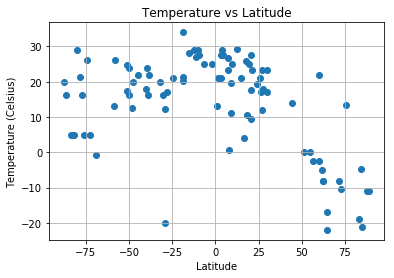

In [84]:
plt.scatter(coordinates_1["lat"], coordinates_1["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

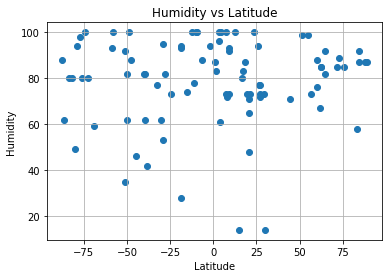

In [83]:
plt.scatter(coordinates_1["lat"], coordinates_1["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs Latitude")
plt.ylabel("Humidity ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities_1.png")

# Show plot
plt.show()

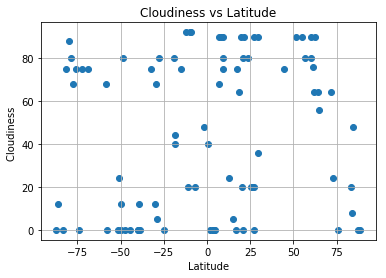

In [82]:
plt.scatter(coordinates_1["lat"], coordinates_1["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude")
plt.ylabel("Cloudiness ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities_1.png")

# Show plot
plt.show()

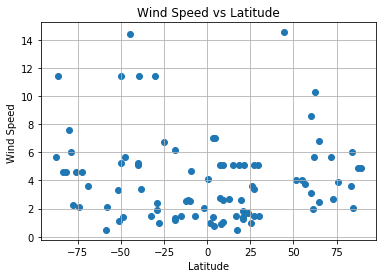

In [81]:
plt.scatter(coordinates_1["lat"], coordinates_1["Wind_Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude")
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities_1.png")

# Show plot
plt.show()